# Mask On, Mask Off: Using CNNs for Facial Mask Detection

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import os
import cv2


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.losses import BinaryCrossentropy

In [35]:
print(os.getcwd())
#os.getcwd()
print(os.listdir(os.getcwd()))

C:\Users\ingri\OneDrive\SynergisticPython\Mask_CNN
['.ipynb_checkpoints', 'Data', 'DL CNN Mask No Mask.ipynb', 'Mask+Classification.ipynb', 'Masks', 'No Masks', 'Open CV Mask.ipynb', 'path', 'Untitled.ipynb']


In [36]:
mask_path ="C:\\Users\\ingri\\OneDrive\\SynergisticPython\\Mask_CNN"
no_mask_path="C:\\Users\\ingri\\OneDrive\\SynergisticPython\\Mask_CNN"

In [37]:
mask_files = glob("Masks/**/*.png", recursive=True)
notmask_files = glob("No Masks/**/*.png", recursive=True)

In [38]:
#mask_files = glob("Mask_CNN/Masks/**/*.png", recursive=True)
#notmask_files = glob("Mask_CNN/No Masks/**/*.png", recursive=True)

In [39]:
len(mask_files)

27

In [40]:
len(notmask_files)

26

In [41]:
img = cv2.imread(mask_files[2])
#img = cv2.imread(mask_files)

In [42]:
img.shape

(211, 270, 3)

In [43]:
#imgs_dir = "Mask_CNN/"

In [44]:
imgs_dir = mask_path

In [45]:
os.listdir(imgs_dir)

['.ipynb_checkpoints',
 'Data',
 'DL CNN Mask No Mask.ipynb',
 'Mask+Classification.ipynb',
 'Masks',
 'No Masks',
 'Open CV Mask.ipynb',
 'path',
 'Untitled.ipynb']

In [46]:
data_gen = ImageDataGenerator(horizontal_flip=True, validation_split=.2)

In [47]:
# flow_from_directory to load the images and labels
training_data = data_gen.flow_from_directory(imgs_dir,
                                             classes=["Masks", "No Masks"], 
                                             batch_size=4, shuffle=True, subset= "training")


Found 43 images belonging to 2 classes.


In [48]:
validation_data = data_gen.flow_from_directory(imgs_dir,
                                             classes=["Masks", "No Masks"], 
                                             batch_size=4, shuffle=True, subset="validation")

Found 10 images belonging to 2 classes.


In [49]:
training_data.class_indices

{'Masks': 0, 'No Masks': 1}

In [50]:
# training_data.filepaths

In [51]:
# training_data.filenames

In [52]:
# X = next(training_data)

In [53]:

cnn = Sequential()
cnn.add(Conv2D(filters=4,#feature detection from image 
                               kernel_size=3,
                               activation='relu',
                               input_shape=[256,256,3]))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dense(2, activation="sigmoid"))

In [54]:
cnn.compile(optimizer='adam', loss = BinaryCrossentropy(), metrics=['accuracy'])

In [55]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 4)       112       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 4)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 127, 127, 4)       0         
                                                                 
 flatten_2 (Flatten)         (None, 64516)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               8258176   
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                      

In [56]:
cnn.fit_generator(training_data, epochs=7, validation_data=validation_data)

Epoch 1/10


C:\Users\ingri\AppData\Local\Temp\ipykernel_2492\1364443037.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(training_data, epochs=10, validation_data=validation_data)


11/11 [==============================] - 2s 105ms/step - loss: 2219.6396 - accuracy: 0.6279 - val_loss: 945.6589 - val_accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 0s 36ms/step - loss: 424.0676 - accuracy: 0.5814 - val_loss: 209.3960 - val_accuracy: 0.5000
Epoch 3/10
11/11 [==============================] - 0s 34ms/step - loss: 112.9624 - accuracy: 0.7209 - val_loss: 120.0557 - val_accuracy: 0.5000
Epoch 4/10
11/11 [==============================] - 0s 35ms/step - loss: 98.7486 - accuracy: 0.6977 - val_loss: 206.9414 - val_accuracy: 0.6000
Epoch 5/10
11/11 [==============================] - 0s 36ms/step - loss: 68.8251 - accuracy: 0.8140 - val_loss: 136.1632 - val_accuracy: 0.5000
Epoch 6/10
11/11 [==============================] - 0s 35ms/step - loss: 26.9190 - accuracy: 0.9070 - val_loss: 105.9320 - val_accuracy: 0.5000
Epoch 7/10
11/11 [==============================] - 0s 35ms/step - loss: 16.4970 - accuracy: 0.9767 - val_loss: 65.5864 - val_accuracy: 0.6000

In [57]:
history = cnn.history.history

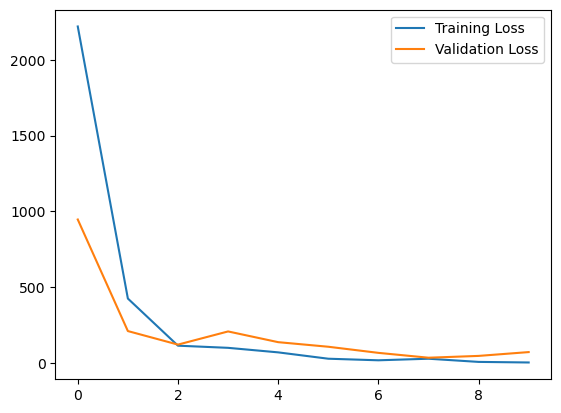

In [58]:
plt.plot(history["loss"], label = "Training Loss")
plt.plot(history["val_loss"], label = "Validation Loss")
plt.legend()

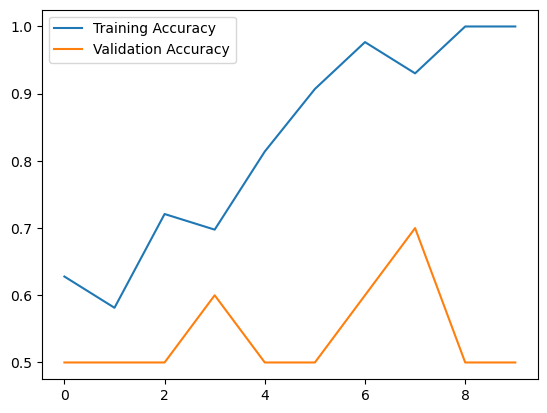

In [59]:
plt.plot(history["accuracy"], label = "Training Accuracy")
plt.plot(history["val_accuracy"], label = "Validation Accuracy")
plt.legend()

In [60]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint

In [61]:
filepath = 'checkpoint folder callback'
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_accuracy',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [62]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,#feature detection from image 
                               kernel_size=3,
                               activation='relu',
                               input_shape=[256,256,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding="same"))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',padding="same"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten()) # converts it to ANN modeling cnn 4d ann 2d rnn 3d rs=t =2d
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))


cnn = Sequential()
cnn.add(Conv2D(filters=32,#feature detection from image 
                               kernel_size=3,
                               activation='relu',
                               input_shape=[256,256,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding="same"))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu',padding="same"))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten()) # converts it to ANN modeling cnn 4d ann 2d rnn 3d rs=t =2d
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))

In [63]:
cnn.compile(optimizer='adam', loss = BinaryCrossentropy(), metrics=['accuracy'])

In [64]:
cnn.fit_generator(training_data, epochs=7, validation_data=validation_data)

Epoch 1/7


C:\Users\ingri\AppData\Local\Temp\ipykernel_2492\3143432401.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(training_data, epochs=7, validation_data=validation_data)


11/11 [==============================] - 2s 115ms/step - loss: 312.3522 - accuracy: 0.5814 - val_loss: 8.7058 - val_accuracy: 0.5000
Epoch 2/7
11/11 [==============================] - 1s 95ms/step - loss: 3.2077 - accuracy: 0.6047 - val_loss: 1.1883 - val_accuracy: 0.8000
Epoch 3/7
11/11 [==============================] - 1s 108ms/step - loss: 1.4669 - accuracy: 0.6977 - val_loss: 1.1313 - val_accuracy: 0.7000
Epoch 4/7
11/11 [==============================] - 1s 94ms/step - loss: 0.4951 - accuracy: 0.8605 - val_loss: 0.9114 - val_accuracy: 0.6000
Epoch 5/7
11/11 [==============================] - 1s 101ms/step - loss: 0.2433 - accuracy: 0.9767 - val_loss: 0.7055 - val_accuracy: 0.8000
Epoch 6/7
11/11 [==============================] - 1s 82ms/step - loss: 0.2086 - accuracy: 0.9535 - val_loss: 1.1605 - val_accuracy: 0.6000
Epoch 7/7
11/11 [==============================] - 1s 82ms/step - loss: 0.2556 - accuracy: 0.9535 - val_loss: 0.5739 - val_accuracy: 0.8000


In [32]:
# X = next(training_data)

In [33]:
# X[0].shape